<a href="https://colab.research.google.com/github/apoorv-changra/ML-projects/blob/main/Neural_network_optimisation_using_genetic_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Genetic Algorithm in Artificial Neural Network and its Optimization Methods**





The goal is to solve a diabetes classification problem using an Artificial Neural Network (ANN) optimized by a Genetic Algorithm, discovering the performance difference of different parameters of the ANN model and comparing this training method with additional optimizers like stochastic gradient descent, RMSprop, and Adam optimizer.





## **Inputs and Outputs**

In the provided diabetes dataset (diabetes.txt), there are 11 columns: the first column represents the bias with all values equal to one; The second to the ninth columns are values of features; The 10th column is the label column which indicates whether the instance is classified as diabetes or not.

During training, the input for all ANNs will consist of the bias and all 8 features together with the label value (y), while the output of the ANNs should be the predicted output according to the ANN’s computation. The training label (y) is to help the ANN to tune its weights in each layer to compute a predicted output that is as close as the training label (y). As for the inputs and outputs of the layers in the ANN model, starting from the input layer, all outputs from each layer will become the inputs for the next layer (Here, we are building a Sequential model).

### diabetes.txt file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to your text file
file_path = "diabetes.txt"

# Open the file and read its contents
with open(file_path, "r") as file:
    file_contents = file.read()

# Display the contents
print(file_contents)


1	0.176471	0.605	0.42623	0	0	0.536513	0.0209223	0.0666667	1	0
1	0.352941	0.72	0.590164	0.27	0.269504	0.505216	0.0755764	0.316667	0	1
1	0.117647	0.875	0.721311	0	0	0.341282	0.105892	0.0166667	0	1
1	0.705882	0.605	0.639344	0.17	0	0.394933	0.0772844	0.683333	0	1
1	0.117647	0.535	0.606557	0.3	0.118203	0.500745	0.139197	0.0333333	0	1
1	0.882353	0.68	0.57377	0.32	0.130024	0.552906	0.0320239	0.366667	1	0
1	0.470588	0.545	0.622951	0.39	0.134752	0.415797	0.239966	0.166667	1	0
1	0.117647	0.405	0.491803	0.22	0	0.412817	0.0905209	0.0666667	0	1
1	0.235294	0.985	0.57377	0.39	0.879433	0.546945	0.961144	0.166667	0	1
1	0	0.525	0.737705	0	0	0.441133	0.0508113	0.416667	0	1
1	0.411765	0.545	0.655738	0.31	0	0.535022	0.447908	0.366667	1	0
1	0.235294	0.415	0.704918	0.19	0	0.436662	0.10205	0.216667	0	1
1	0.352941	0.77	0.606557	0.32	0.228132	0.436662	0.324936	0.3	0	1
1	0.176471	0.79	0.622951	0.36	0.289598	0.470939	0.33006	0.116667	1	0
1	0.647059	0.69	0.622951	0	0	0.494784	0.146029	0.233333	0	1
1	0.176471	0.5	0

# **Gathering Training Data**

From the diabetes dataset (diabetes.txt), I divided all 768 tuples into two parts: let the first 75% tuples be the training data and the rest 25% of the tuples be the final testing data.

## **ANN learning/ training method**

In this project, I built an artificial neural network using a genetic algorithm to optimize the weights in each layer of the training model to predict the unseen diabetes dataset.

Initially, for a constant number of populations (e.g., 20) is set, the sequential model will generate the weights of all layers for each population randomly. Then the training data will be fed into the training model, and the predicting process begins. After the fitness calculation, which compares the true output and the predicted output, the program will update the maximum fitness value for the final training since its weights are the optimal ones and could likely yield higher accuracy in the final training stage. This process will continue going on until the maximum generation is met.

After optimizing the weight matrix, the optimal matrix will be set to the ANN model and be ready to generalize the testing data. In one particular example, I set the model with one input layer, three hidden layers with eight, six, and six neurons, respectively, and finally, one neuron for the output layer.

### Ensure the ANN can generalize well.

Although it is tough to promise that the ANN can always generalize the testing data well, applying a genetic algorithm could help raise the accuracy rate by preventing the model from being trapped in a local minimum scenario.

The three key parts of the genetic algorithm (GA) is selection, crossover, and mutation. First, the mechanism selects the elite parents to the gene pool (an array that keeps track of the best matrix of weights) to realize the elitism. Second, the crossover is implemented. Among the best genes (weighted matrix), the mechanism selects two genes randomly and recombines them in a certain approach defined in the provided python code. For instance, in this case, I randomly choose a split point for the elite gene 1 and gene 2. Then I concatenate the second part of gene 2 to the first part of gene 1 and perform the reverse method for the remaining parts of the two genes. As a result, I have two recombined possibly elite genes. Third, a mutation might occur since it happens on a random basis. Each generation, after performing the crossover, the mechanism will generate a random number between 0 to 1. If the randomly generated number is less than or equal to 0.05, a particular part of the weighted matrix, which is also defined randomly, will be multiplied by another random number between 2 and 5. By slightly scaling some values in the weighted matrix can help achieve the mutation process to prevent the ANN model from being trained in the wrong direction (yielding a lower training accuracy rate).

There are so many factors that could affect the performance of an ANN. Including the number of layers and number of neurons in each layer, learning rate, optimization function, loss function, and others. In a genetic algorithm, population size, number of generations, crossover rate, mutation rate, and probability also need to be considered when building the ANN. For instance, in theory, if the mutation rate and its mutation probability are high, the model should come up with a weighted matrix with a higher variance of values than those with a lower mutation rate and lower mutation probability. Its main goal is to try to solve the drawback of the traditional gradient descent learning algorithm by ensuring having various possible weighted matrices instead of possibly training a model in a wrong approach without getting an optimal solution for any problem.

# **Performance comparison of different training methods**

To compare different training algorithms or methods, I tested ANN models with SGD (Stochastic Gradient Descent), RMSprop (Root Mean Square Propagation), and Adam (Adaptive moment estimation) training methods using the Keras model in python. Below are the results of the different algorithms.

### **ADAM (Adaptive moment estimation) Training** **Method**

Epoch 1/150
18/18 [==============================] - 1s 3ms/step - loss: 0.5305 - accuracy: 0.3438
Epoch 2/150
18/18 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.3316
Epoch 3/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.6267
Epoch 4/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.6562
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.6562
Epoch 6/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.6562
Epoch 7/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.6562
Epoch 8/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.6562
Epoch 9/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.6562
Epoch 10/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.6562
Epoch 11/

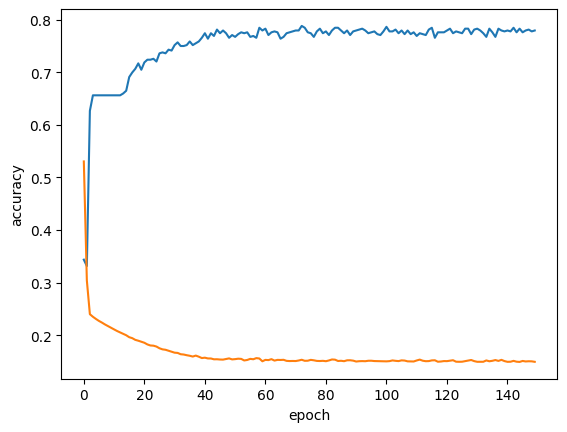

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(message)s',
                    handlers=[logging.FileHandler("gnn.log"),
                              logging.StreamHandler()])

# Read Data
df = pd.read_table('./diabetes.txt',header=None,encoding='gb2312',sep='\t')
df.astype(float)
# remove redundant col which is the opposite value of the 10th col
df.pop(10)
# remove first col of bias = 1
df.pop(0)
# the label column
label = df.pop(9)

# train feature
train_feature = df[:576]
# train label
train_label = label[:576]
# test feature
test_feature = df[576:]
# test label
test_label = label[576:]

model1 = Sequential([
    Dense(6, input_shape=(8,), activation='relu', bias_initializer='ones', kernel_initializer='random_uniform'),
    Dense(6, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])


model1.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              loss='mean_squared_error',
              metrics=['accuracy'])

epochs = 150
history1 = model1.fit(train_feature.values, train_label.values, epochs=epochs)

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

test_loss, test_acc = model1.evaluate(test_feature,  test_label, verbose=2)
print('\nTest accuracy:', test_acc)

### **SGD (Stochastic Gradient Descent) Training** **Method**

Epoch 1/150
18/18 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.6562
Epoch 2/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.6562
Epoch 3/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.6562
Epoch 4/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.6562
Epoch 5/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.6562
Epoch 6/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.6562
Epoch 7/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.6562
Epoch 8/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.6562
Epoch 9/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.6562
Epoch 10/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.6562
Epoch 11/

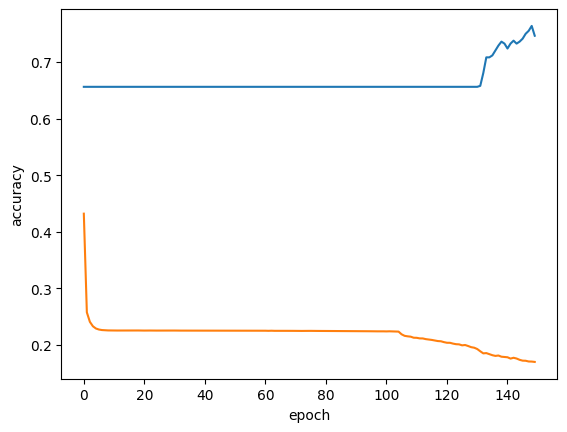

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(message)s',
                    handlers=[logging.FileHandler("gnn.log"),
                              logging.StreamHandler()])

# Read Data
df = pd.read_table('./diabetes.txt',header=None,encoding='gb2312',sep='\t')
df.astype(float)
# remove redundant col which is the opposite value of the 10th col
df.pop(10)
# remove first col of bias = 1
df.pop(0)
# the label column
label = df.pop(9)

# train feature
train_feature = df[:576]
# train label
train_label = label[:576]
# test feature
test_feature = df[576:]
# test label
test_label = label[576:]

model = Sequential([
    Dense(6, input_shape=(8,), activation='relu', bias_initializer='ones', kernel_initializer='random_uniform'),
    Dense(6, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])


model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False),
              loss='mean_squared_error',
              metrics=['accuracy'])

epochs = 150
history = model.fit(train_feature.values, train_label.values, epochs=epochs)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

test_loss, test_acc = model.evaluate(test_feature,  test_label, verbose=2)
print('\nTest accuracy:', test_acc)

### **RMSprop (Root Mean Square Propagation)**

Epoch 1/150
18/18 [==============================] - 1s 4ms/step - loss: 0.2812 - accuracy: 0.3490
Epoch 2/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.6493
Epoch 3/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.6562
Epoch 4/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.6562
Epoch 5/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.6562
Epoch 6/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.6562
Epoch 7/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.6562
Epoch 8/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.6562
Epoch 9/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2221 - accuracy: 0.6562
Epoch 10/150
18/18 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.6562
Epoch 11/

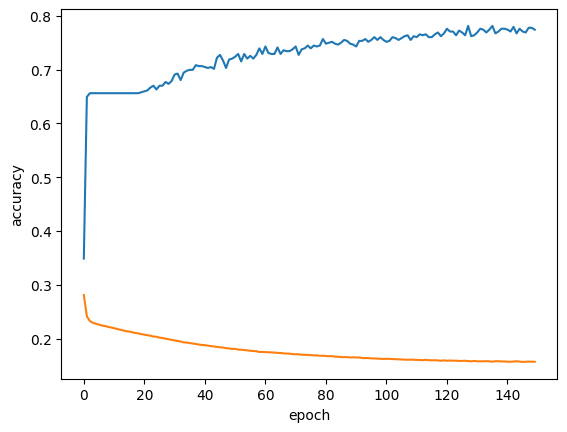

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(message)s',
                    handlers=[logging.FileHandler("gnn.log"),
                              logging.StreamHandler()])

# Read Data
df = pd.read_table('./diabetes.txt',header=None,encoding='gb2312',sep='\t')
df.astype(float)
# remove redundant col which is the opposite value of the 10th col
df.pop(10)
# remove first col of bias = 1
df.pop(0)
# the label column
label = df.pop(9)

# train feature
train_feature = df[:576]
# train label
train_label = label[:576]
# test feature
test_feature = df[576:]
# test label
test_label = label[576:]

model = Sequential([
    Dense(6, input_shape=(8,), activation='relu', bias_initializer='ones', kernel_initializer='random_uniform'),
    Dense(6, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              loss='mean_squared_error',
              metrics=['accuracy'])

epochs = 150
history = model.fit(train_feature.values, train_label.values, epochs=epochs)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

test_loss, test_acc = model.evaluate(test_feature,  test_label, verbose=2)
print('\nTest accuracy:', test_acc)

From the experiment above, we can see that the stochastic gradient descent method indeed has a problem of converging to the global minimum, resulting in an accuracy lower than other training methods. On the other hand, the genetic algorithm performs well since it has the selection, crossover, and mutation mechanisms that could improve the local minimum dilemma by producing variant kinds of genes (weighted matrix) and selecting the best among them.

# **ANN Optimisation - Genetic Algorithm**

In [ ]:
import random
import logging
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(message)s',
                    handlers=[logging.FileHandler("ann_test.log"),
                              logging.StreamHandler()])

class ANN(Sequential):

    def __init__(self, child_weights=None):
        super().__init__()

        if child_weights is None:
            layer1 = Dense(6, input_shape=(8,), activation='relu')
            layer2 = Dense(6, activation='relu')
            layer3 = Dense(4, activation='relu')
            layer4 = Dense(1, activation='linear')
            self.add(layer1)
            self.add(layer2)
            self.add(layer3)
            self.add(layer4)
        else:
            self.add(
                Dense(
                    6,
                    input_shape=(8,),
                    activation='relu',
                    weights=[child_weights[0], np.ones(6)])
                )
            self.add(
                Dense(
                    6,
                    activation='relu',
                    weights=[child_weights[1], np.zeros(6)])
            )
            self.add(
                Dense(
                    4,
                    activation='relu',
                    weights=[child_weights[2], np.zeros(4)])
            )
            self.add(
                Dense(
                    1,
                    activation='linear',
                    weights=[child_weights[3], np.zeros(1)])
            )

    def forward_propagation(self, train_feature, train_label):
        predict_label = self.predict(train_feature.values)
        self.fitness = accuracy_score(train_label, predict_label.round())

def crossover(nn1, nn2):

    nn1_weights = []
    nn2_weights = []
    child_weights = []

    for layer in nn1.layers:
        nn1_weights.append(layer.get_weights()[0])

    for layer in nn2.layers:
        nn2_weights.append(layer.get_weights()[0])

    for i in range(len(nn1_weights)):
        # Get single point to split the matrix in parents based on # of cols
        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        # Iterate through after a single point and set the remaing cols to nn_2
        for j in range(split, np.shape(nn1_weights[i])[1]-1):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        child_weights.append(nn1_weights[i])

    mutation(child_weights)

    child = ANN(child_weights)
    return child

def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut <= .05:
        child_weights[selection] *= random.randint(2, 5)
    else:
        pass

# Preprocess Data
df = pd.read_table('./diabetes.txt',header=None,encoding='gb2312',sep='\t')
df.astype(float)
# remove redundant col which is the opposite value of the 10th col
df.pop(10)
# remove first col of bias = 1
df.pop(0)
# the label column
label = df.pop(9)
# train feature
train_feature = df[:576]
# train label
train_label = label[:576]
# test feature
test_feature = df[576:]
# test label
test_label = label[576:]

# store all active ANNs
networks = []
pool = []
# Generation counter
generation = 0
# Initial Population
population = 10
for i in range(population):
    networks.append(ANN())
# Track Max Fitness
max_fitness = 0
# Store Max Fitness Weights
optimal_weights = []

epochs = 10
# Evolution Loop
for i in range(epochs):
    generation += 1
    logging.debug("Generation: " + str(generation) + "\r\n")

    for ann in networks:
        # Propagate to calculate fitness score
        ann.forward_propagation(train_feature, train_label)
        # Add to pool after calculating fitness
        pool.append(ann)

    # Clear for propagation of next children
    networks.clear()

    # Sort anns by fitness
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()

    # Find Max Fitness and Log Associated Weights
    for i in range(len(pool)):
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness

            logging.debug("Max Fitness: " + str(max_fitness) + "\r\n")

            # Iterate through layers, get weights, and append to optimal
            optimal_weights = []
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])
            logging.debug('optimal_weights: ' + str(optimal_weights)+"\r\n")

    # Crossover: top 5 randomly select 2 partners
    for i in range(5):
        for j in range(2):
            # Create a child and add to networks
            temp = crossover(pool[i], random.choice(pool))
            # Add to networks to calculate fitness score next iteration
            networks.append(temp)

# Create a Genetic Neural Network with optimal initial weights
ann = ANN(optimal_weights)
predict_label = ann.predict(test_feature.values)
print('Test Accuracy: %.2f' % accuracy_score(test_label, predict_label.round()))

6/6 [==============================] - 0s 2ms/step
Test Accuracy: 0.64


## Parameters tuning and discoveries!!

Some factors may affect the genetic algorithm-based ANN model’s performance, such as the number of layers, number of neurons in one layer, population size, and the number of generations. Therefore, I ran through some training to discover the performance of the model with different parameters.

Here to simplify the expression,


*   iL = input layer
*   hL = hidden layer(s)

*   oL = output layer
*   n = number of neurons in one layer





### Tune the number of neurons

These training and testing were using genetic algorithms with 20 initial populations and were run in 200 generations

In [ ]:
# @title
from tabulate import tabulate

# Define the table data
table_data = [
    ["Model", "Max fitness (accuracy)", "Testing accuracy"],
    ["iL-> 1hL (2n) -> OL", "0.67", "0.64"],
    ["iL-> 1hL (4n) -> OL", "0.70", "0.68"],
    ["iL-> 1hL (6n) -> OL", "0.67", "0.67"],
    ["iL-> 1hL (8n) -> OL", "0.71", "0.70"],
]

# Print the table using tabulate
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+---------------------+--------------------------+--------------------+
| Model               |   Max fitness (accuracy) |   Testing accuracy |
+=====================+==========================+====================+
| iL-> 1hL (2n) -> OL |                     0.67 |               0.64 |
+---------------------+--------------------------+--------------------+
| iL-> 1hL (4n) -> OL |                     0.7  |               0.68 |
+---------------------+--------------------------+--------------------+
| iL-> 1hL (6n) -> OL |                     0.67 |               0.67 |
+---------------------+--------------------------+--------------------+
| iL-> 1hL (8n) -> OL |                     0.71 |               0.7  |
+---------------------+--------------------------+--------------------+


From table 1, it is obvious that with all parameters remain the same but only tune the number of neurons in the only hidden layer, the more neurons in the layer have higher accuracy in classifying the unseen data. Thus, although the testing accuracy and maximum fitness are not strictly increasing along with the increased number of neurons in the hidden layer, it shows a clear trend in the number of neurons in a layer and accuracy rate.

### Increase the number of layers and tune the number of neurons in each layer

These training and testing were using genetic algorithms with 20 initial populations and were run in 200 generations.



In [ ]:
# @title
from tabulate import tabulate

# Define the table data
table_data = [
    ["Model", "Max fitness (accuracy)", "Testing accuracy"],
    ["iL-> 2hL (8n, 8n) - > OL", "0.75", "0.69"],
    ["iL-> 1hL (8n, 16n) - > OL", "0.76", "0.73"],
    ["iL-> 1hL (16n, 16n) - > OL", "0.75", "0.676"],

]

# Print the table using tabulate
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+----------------------------+--------------------------+--------------------+
| Model                      |   Max fitness (accuracy) |   Testing accuracy |
+============================+==========================+====================+
| iL-> 2hL (8n, 8n) - > OL   |                     0.75 |              0.69  |
+----------------------------+--------------------------+--------------------+
| iL-> 1hL (8n, 16n) - > OL  |                     0.76 |              0.73  |
+----------------------------+--------------------------+--------------------+
| iL-> 1hL (16n, 16n) - > OL |                     0.75 |              0.676 |
+----------------------------+--------------------------+--------------------+


According to table 2, with more neurons in each layer, the testing accuracy gets higher. The result reinforces the discovery from table 1. Additionally, comparing table 1 and table 2, we can observe that more hidden layers can also raise the accuracy rate.

### Tuning the population size

From many trials, I discovered that turning the initial population size doesn’t significantly impact the accuracy rate since the genetic algorithm mechanism will eventually tune the weighted matrix towards an optimal status.

### Tuning the number of generations

Same as tuning the population size of the gene pool, it is also hard to say that with more generations, the higher accuracy one will get. From many trials I trained the model with 10, 25, 50, 100 and 200 generations, sometimes 10 generations yield a better result (test accuracy = 0.72) than 50 generations (test accuracy = 0.64). however, according to the rule of thumbs, there is still a higher probability for models with a higher number of generations that generate a better-weighted matrix and yields a better accuracy score.

# **Improving the current GA based ANN model**

Alternatively, to achieve a higher accuracy apart from applying the genetic algorithm, I tried to attach an additional training for the ANN model, which is by applying the Adam optimizer with Mean squared error regression loss function to compile the ANN model with the optimal weight matrix. The followings are my discoveries:

In [ ]:
import random
import logging
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(message)s',
                    handlers=[logging.FileHandler("ga+adam.log"),
                              logging.StreamHandler()])

class ANN(Sequential):

    def __init__(self, child_weights=None):
        super().__init__()

        if child_weights is None:
            layer1 = Dense(6, input_shape=(8,), activation='relu')
            layer2 = Dense(6, activation='relu')
            layer3 = Dense(4, activation='relu')
            layer4 = Dense(1, activation='linear')
            self.add(layer1)
            self.add(layer2)
            self.add(layer3)
            self.add(layer4)
        else:
            self.add(
                Dense(
                    6,
                    input_shape=(8,),
                    activation='relu',
                    weights=[child_weights[0], np.ones(6)])
                )
            self.add(
                Dense(
                    6,
                    activation='relu',
                    weights=[child_weights[1], np.zeros(6)])
            )
            self.add(
                Dense(
                    4,
                    activation='relu',
                    weights=[child_weights[2], np.zeros(4)])
            )
            self.add(
                Dense(
                    1,
                    activation='linear',
                    weights=[child_weights[3], np.zeros(1)])
            )

    def forward_propagation(self, train_feature, train_label):
        predict_label = self.predict(train_feature.values)
        self.fitness = accuracy_score(train_label, predict_label.round())

    def compile_train(self, train_feature, train_label, epochs):
        self.compile(
                      optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                      loss='mean_squared_error',
                      metrics=['accuracy']
                      )
        #epochs = 5000
        self.fit(train_feature.values, train_label.values, epochs=epochs)

def crossover(nn1, nn2):

    nn1_weights = []
    nn2_weights = []
    child_weights = []

    for layer in nn1.layers:
        nn1_weights.append(layer.get_weights()[0])

    for layer in nn2.layers:
        nn2_weights.append(layer.get_weights()[0])

    for i in range(len(nn1_weights)):
        # Get single point to split the matrix in parents based on # of cols
        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        # Iterate through after a single point and set the remaing cols to nn_2
        for j in range(split, np.shape(nn1_weights[i])[1]-1):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        child_weights.append(nn1_weights[i])

    mutation(child_weights)

    child = ANN(child_weights)
    return child

def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut <= .05:
        child_weights[selection] *= random.randint(2, 5)
    else:
        pass

# Preprocess Data
df = pd.read_table('./diabetes.txt',header=None,encoding='gb2312',sep='\t')
df.astype(float)
# remove redundant col which is the opposite value of the 10th col
df.pop(10)
# remove first col of bias = 1
df.pop(0)
# the label column
label = df.pop(9)
# train feature
train_feature = df[:576]
# train label
train_label = label[:576]
# test feature
test_feature = df[576:]
# test label
test_label = label[576:]

# store all active ANNs
networks = []
pool = []
# Generation counter
generation = 0
# Initial Population
population = 10
for i in range(population):
    networks.append(ANN())
# Track Max Fitness
max_fitness = 0
# Store Max Fitness Weights
optimal_weights = []

epochs = 10
# Evolution Loop
for i in range(epochs):
    generation += 1
    logging.debug("Generation: " + str(generation) + "\r\n")

    for ann in networks:
        # Propagate to calculate fitness score
        ann.forward_propagation(train_feature, train_label)
        # Add to pool after calculating fitness
        pool.append(ann)

    # Clear for propagation of next children
    networks.clear()

    # Sort anns by fitness
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()

    # Find Max Fitness and Log Associated Weights
    for i in range(len(pool)):
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness

            logging.debug("Max Fitness: " + str(max_fitness) + "\r\n")

            # Iterate through layers, get weights, and append to optimal
            optimal_weights = []
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])
            logging.debug('optimal_weights: ' + str(optimal_weights)+"\r\n")

    # Crossover: top 5 randomly select 2 partners
    for i in range(5):
        for j in range(2):
            # Create a child and add to networks
            temp = crossover(pool[i], random.choice(pool))
            # Add to networks to calculate fitness score next iteration
            networks.append(temp)

# Create a Genetic Neural Network with optimal initial weights
ann = ANN(optimal_weights)
predict_label = ann.predict(test_feature.values)
print('Test Accuracy: %.2f' % accuracy_score(test_label, predict_label.round()))

6/6 [==============================] - 0s 2ms/step
Test Accuracy: 0.72


In [ ]:
import random
import logging
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(message)s',
                    handlers=[logging.FileHandler("ga+rmsp.log"),
                              logging.StreamHandler()])

class ANN(Sequential):

    def __init__(self, child_weights=None):
        super().__init__()

        if child_weights is None:
            layer1 = Dense(6, input_shape=(8,), activation='relu')
            layer2 = Dense(6, activation='relu')
            layer3 = Dense(4, activation='relu')
            layer4 = Dense(1, activation='linear')
            self.add(layer1)
            self.add(layer2)
            self.add(layer3)
            self.add(layer4)
        else:
            self.add(
                Dense(
                    6,
                    input_shape=(8,),
                    activation='relu',
                    weights=[child_weights[0], np.ones(6)])
                )
            self.add(
                Dense(
                    6,
                    activation='relu',
                    weights=[child_weights[1], np.zeros(6)])
            )
            self.add(
                Dense(
                    4,
                    activation='relu',
                    weights=[child_weights[2], np.zeros(4)])
            )
            self.add(
                Dense(
                    1,
                    activation='linear',
                    weights=[child_weights[3], np.zeros(1)])
            )

    def forward_propagation(self, train_feature, train_label):
        predict_label = self.predict(train_feature.values)
        self.fitness = accuracy_score(train_label, predict_label.round())

    def compile_train(self, train_feature, train_label, epochs):
        self.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              loss='mean_squared_error',
              metrics=['accuracy'])

        self.fit(train_feature.values, train_label.values, epochs=epochs)

def crossover(nn1, nn2):

    nn1_weights = []
    nn2_weights = []
    child_weights = []

    for layer in nn1.layers:
        nn1_weights.append(layer.get_weights()[0])

    for layer in nn2.layers:
        nn2_weights.append(layer.get_weights()[0])

    for i in range(len(nn1_weights)):
        # Get single point to split the matrix in parents based on # of cols
        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        # Iterate through after a single point and set the remaing cols to nn_2
        for j in range(split, np.shape(nn1_weights[i])[1]-1):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        child_weights.append(nn1_weights[i])

    mutation(child_weights)

    child = ANN(child_weights)
    return child

def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut <= .05:
        child_weights[selection] *= random.randint(2, 5)
    else:
        pass

# Preprocess Data
df = pd.read_table('./diabetes.txt',header=None,encoding='gb2312',sep='\t')
df.astype(float)
# remove redundant col which is the opposite value of the 10th col
df.pop(10)
# remove first col of bias = 1
df.pop(0)
# the label column
label = df.pop(9)
# train feature
train_feature = df[:576]
# train label
train_label = label[:576]
# test feature
test_feature = df[576:]
# test label
test_label = label[576:]

# store all active ANNs
networks = []
pool = []
# Generation counter
generation = 0
# Initial Population
population = 10
for i in range(population):
    networks.append(ANN())
# Track Max Fitness
max_fitness = 0
# Store Max Fitness Weights
optimal_weights = []

epochs = 10
# Evolution Loop
for i in range(epochs):
    generation += 1
    logging.debug("Generation: " + str(generation) + "\r\n")

    for ann in networks:
        # Propagate to calculate fitness score
        ann.forward_propagation(train_feature, train_label)
        # Add to pool after calculating fitness
        pool.append(ann)

    # Clear for propagation of next children
    networks.clear()

    # Sort anns by fitness
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()

    # Find Max Fitness and Log Associated Weights
    for i in range(len(pool)):
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness

            logging.debug("Max Fitness: " + str(max_fitness) + "\r\n")

            # Iterate through layers, get weights, and append to optimal
            optimal_weights = []
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])
            logging.debug('optimal_weights: ' + str(optimal_weights)+"\r\n")

    # Crossover: top 5 randomly select 2 partners
    for i in range(5):
        for j in range(2):
            # Create a child and add to networks
            temp = crossover(pool[i], random.choice(pool))
            # Add to networks to calculate fitness score next iteration
            networks.append(temp)

# Create a Genetic Neural Network with optimal initial weights
ann = ANN(optimal_weights)
predict_label = ann.predict(test_feature.values)
print('Test Accuracy: %.2f' % accuracy_score(test_label, predict_label.round()))

6/6 [==============================] - 0s 2ms/step
Test Accuracy: 0.70


# **Conclusion**

Combining Genetic Algorithms (GA) with Artificial Neural Networks (ANNs) and optimizers presents a compelling strategy for tackling intricate optimization problems. GA's ability to explore a vast search space and its robustness against local optima can lead to superior ANN configurations compared to traditional optimizers. Moreover, GA can potentially handle feature selection implicitly through the fitness function design. However, the computational cost associated with training multiple ANNs within the GA framework and the need for meticulous parameter tuning for both GA and ANNs are noteworthy challenges. Additionally, the effectiveness of this approach hinges on a problem-specific design, particularly regarding the fitness function and GA operators. Overall, GA-ANN systems with well-chosen optimizers offer a promising approach, but careful consideration of its complexities is essential for successful implementation.

# Future and Scope

The future scope of our proposed work can be carried
out using some new hybrid techniques that incorporate
wavelet transform, feature extraction, feature selection,
Adaptive Neuro Fuzzy Inference, or wavelet techniques
with Genetic Algorithm. To improve the accuracy of the
results, various tuning parameters such as learning rate,
momentum, and so on can be combined with GANN.